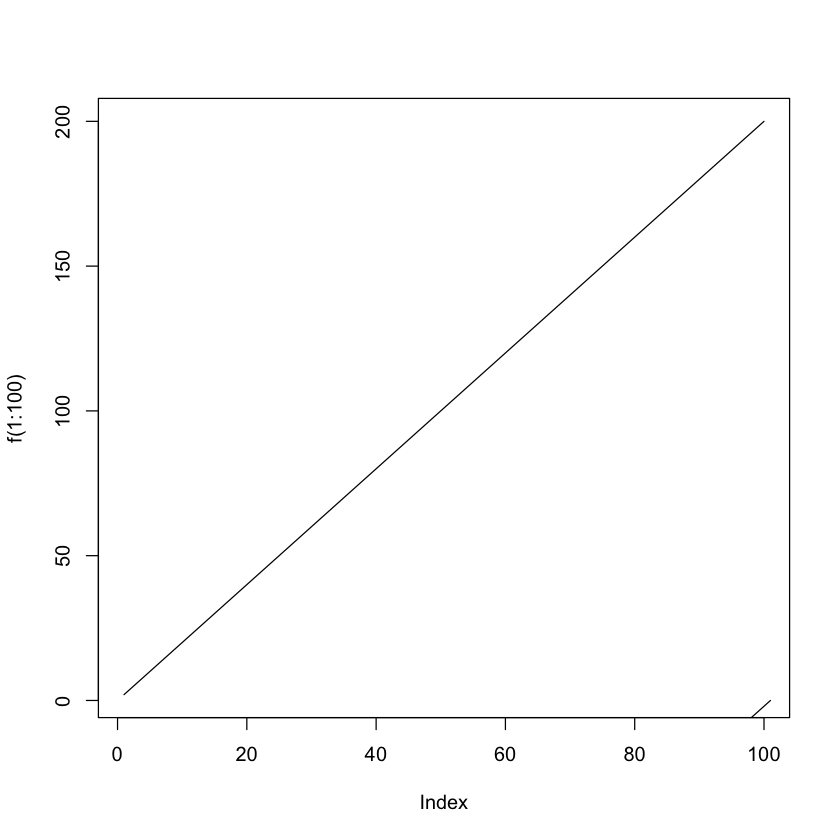

In [7]:
f = function(x) { 1 + 3*x - (x + 1)}
plot(f(1:100), type='l')
plot(f(-100:0), type='l')
